In [ ]:
# Importando os dados

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['Comprimento_sepal','Largura_sepal','Comprimento_length','Largura_width','Classificacao']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dados = dataset.drop("Classificacao", axis=1)

# Escalonar e Não Normalizar, caso queira. o Escalonamento faz com que a variância de cada variável seja unitária para o modelo performar melhor 

from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
dados_escalonados = escala.fit_transform(dados)
print(dados_escalonados)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[600.0,
 223.73200573676345,
 140.96581663074699,
 114.61550694959806,
 91.19197002146461,
 80.23060704506955,
 72.50002965891882,
 62.66035232447274,
 55.28220712380386,
 47.8509213570517]

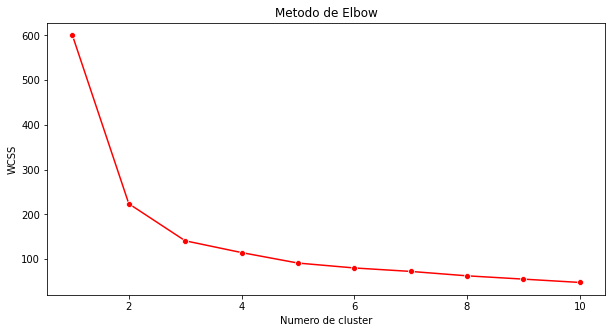

In [ ]:
# Metodo Elbow para definiri a quantidade de Cluster (K)
import matplotlib.pyplot as plt
import seaborn as sb

def elbow(dados_escalonados):
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados_escalonados)
    wcss.append(kmeans.inertia_)
  #Plota Metodo Elbow
  plt.figure(figsize=(10,5))
  sb.lineplot(range(1,11), wcss, marker='o', color='red')
  plt.title('Metodo de Elbow')
  plt.xlabel('Numero de cluster')
  plt.ylabel('WCSS')
  return wcss
elbow(dados_escalonados)

In [ ]:
from sklearn.cluster import KMeans

#Treinando o Modelo
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
#Sem dados escalonados
kmeans2 = kmeans.fit(dados)
#Com os dados escalonados
#kmeans2 = kmeans.fit(dados_escalonados)

centroides = kmeans2.cluster_centers_
#print(centroides)

agrupamento = kmeans2.labels_
agrupamento

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#Inserindo a coluna Grupo
dados['Grupo'] = agrupamento
dados.head(70)

[0.72770452 0.23030523]
0.9580097536148197


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[574.8058521688916, 198.70683592637357, 116.10924021401527, 89.68987502512226, 66.3175495444791, 57.00855078122429, 47.86117712433257, 39.259350653667276, 32.14134238532108, 28.907008880252526]


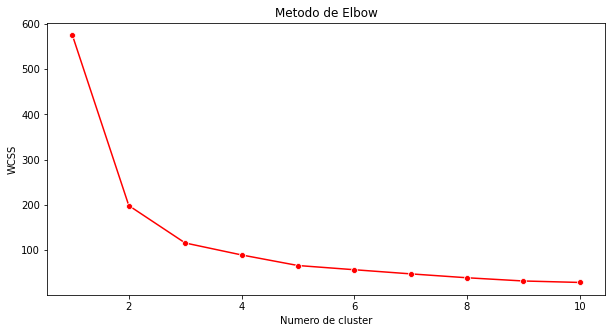

In [ ]:
# PCA para plotar o gráfico

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

dados_pca = pca.fit_transform(dados_escalonados)
#print(dados_pca)

# Variáveis explicativas
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

#Elbow
print(elbow(dados_pca))

kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)
kmeans2 = kmeans.fit(dados_pca)

centroides = kmeans2.cluster_centers_

agrupamento = kmeans2.labels_
agrupamento

#Plotar o Grafico
import plotly.express as px
import plotly.graph_objects as go

graf1 = px.scatter(x=dados_pca[:,0], y=dados_pca[:,1], color=agrupamento)
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size = [15,15,15]) #size é o numero de cluster
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 1')

graf3.show()

